In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt 
import datetime 
%matplotlib inline

### Reading data from the Web

In [2]:
# this will grab a list of the tables available
df_list = pd.read_html('http://www.bloomberg.com/markets/currencies/major')
len(df_list)

1

In [3]:
df = df_list[0]

In [4]:
df.set_index('Currency',inplace = True)

In [5]:
df

,Value,Change,Net Change,Time (EDT),2 Day
Currency,,,,,
EUR-USD,1.1760,-0.0055,-0.47%,7:22 AM,NaN
USD-JPY,109.4000,0.4200,+0.39%,7:22 AM,NaN
GBP-USD,1.2826,-0.0074,-0.57%,7:22 AM,NaN
AUD-USD,0.7902,-0.0037,-0.47%,7:22 AM,NaN
USD-CAD,1.2581,0.0023,+0.18%,7:22 AM,NaN
USD-CHF,0.9661,0.0042,+0.44%,7:22 AM,NaN
EUR-JPY,128.6600,-0.0900,-0.07%,7:22 AM,NaN
EUR-GBP,0.9169,0.0009,+0.10%,7:22 AM,NaN
USD-HKD,7.8267,0.0029,+0.04%,7:22 AM,NaN


In [6]:
# extract value of specific currency rate of change 

df.loc['EUR-CHF', 'Value']

1.1361000000000001

In [7]:
# chain indexing will not change the df value, but rather make a copy 
eur_usd = df.loc['EUR-USD']['Change']
df.loc['EUR-USD']['Change'] = 1.0
print(eur_usd)
print(df.loc['EUR-USD']['Change'])

-0.0055
-0.0055


/Users/spydermac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# alternatively, use the other type of indexing to change the value
eur_usd = df.loc['EUR-USD','Change']
df.loc['EUR-USD','Change'] = 1.0
print(eur_usd)
print(df.loc['EUR-USD','Change'])



-0.0055
1.0


## Getting historical stock prices from Google Finance

In [27]:
start = datetime.datetime(2017, 5, 1)
end = datetime.datetime.today()

print (start, end)

2017-05-01 00:00:00 2017-08-22 12:35:34.832778


In [30]:
# for DataReader, specify the ticker, the source of date, start and end dats
df = data.DataReader('AAPL', 'google', start, end)



In [32]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-01,145.10,147.20,144.96,146.58,33602943
2017-05-02,147.54,148.09,146.84,147.51,45352194
2017-05-03,145.59,147.49,144.27,147.06,45697034
2017-05-04,146.52,147.14,145.81,146.53,23371872
2017-05-05,146.76,148.98,146.76,148.96,27327725
2017-05-08,149.03,153.70,149.03,153.01,48752413
2017-05-09,153.87,154.88,153.45,153.99,39130363
2017-05-10,153.63,153.94,152.11,153.26,25805692
2017-05-11,152.45,154.07,152.31,153.95,27255058


In [34]:
# investigating data: to see if buying at the open, and sell at the close time, 
# will you make money?
# Adding a column value of 1 where close is higher than open, and 0 otherwise

df['Up'] = np.where(df['Close']>df['Open'],1,0)


In [35]:
df.head()

,Open,High,Low,Close,Volume,Up
Date,,,,,,
2017-05-01,145.10,147.20,144.96,146.58,33602943,1
2017-05-02,147.54,148.09,146.84,147.51,45352194,0
2017-05-03,145.59,147.49,144.27,147.06,45697034,1
2017-05-04,146.52,147.14,145.81,146.53,23371872,1
2017-05-05,146.76,148.98,146.76,148.96,27327725,1


## Time Series Analysis

### Get Summary Stats

In [36]:
df.describe()

,Open,High,Low,Close,Volume,Up
count,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000
mean,151.096582,152.139494,149.874177,151.065316,2.817015e+07,0.518987
std,5.224150,5.165836,5.161496,5.080931,1.138717e+07,0.502832
min,142.900000,143.500000,142.200000,142.270000,1.427785e+07,0.000000
25%,145.820000,147.180000,145.035000,146.310000,2.108014e+07,0.000000
50%,151.500000,153.340000,149.900000,151.020000,2.533166e+07,1.000000
75%,154.800000,155.495000,153.620000,154.720000,3.184830e+07,1.000000
max,161.940000,162.510000,160.150000,161.600000,7.230733e+07,1.000000


In [37]:
# calculate the percentage of days that the stock closed higher
df['Up'].sum()/df['Up'].count()*100

51.898734177215189

In [39]:
#calculate the percentage change in time series
df['Close'].pct_change()

Date
2017-05-01         NaN
2017-05-02    0.006345
2017-05-03   -0.003051
2017-05-04   -0.003604
2017-05-05    0.016584
2017-05-08    0.027189
2017-05-09    0.006405
2017-05-10   -0.004741
2017-05-11    0.004502
2017-05-12    0.013966
2017-05-15   -0.002562
2017-05-16   -0.001477
2017-05-17   -0.033576
2017-05-18    0.015241
2017-05-19    0.003409
2017-05-22    0.006076
2017-05-23   -0.001234
2017-05-24   -0.002991
2017-05-25    0.003456
2017-05-26   -0.001690
2017-05-30    0.000391
2017-05-31   -0.005922
2017-06-01    0.002749
2017-06-02    0.014819
2017-06-05   -0.009778
2017-06-06    0.003378
2017-06-07    0.005957
2017-06-08   -0.002446
2017-06-09   -0.038777
2017-06-12   -0.023896
                ...   
2017-07-11    0.003240
2017-07-12    0.001443
2017-07-13    0.013929
2017-07-14    0.008594
2017-07-17    0.003489
2017-07-18    0.003477
2017-07-19    0.006263
2017-07-20   -0.004503
2017-07-21   -0.000466
2017-07-24    0.012112
2017-07-25    0.004274
2017-07-26    0.004714
2017-0

In [44]:
# calc the mean of pct change
df['Close'].pct_change(13).mean()

0.009662122803378843

In [46]:
# Rolling windows, to calc the rolling mean
# Rolling windows is used to smooth data with comparitvely bigger windows

df['Close'].pct_change(13).rolling(21).mean()


Date
2017-05-01         NaN
2017-05-02         NaN
2017-05-03         NaN
2017-05-04         NaN
2017-05-05         NaN
2017-05-08         NaN
2017-05-09         NaN
2017-05-10         NaN
2017-05-11         NaN
2017-05-12         NaN
2017-05-15         NaN
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
2017-05-22         NaN
2017-05-23         NaN
2017-05-24         NaN
2017-05-25         NaN
2017-05-26         NaN
2017-05-30         NaN
2017-05-31         NaN
2017-06-01         NaN
2017-06-02         NaN
2017-06-05         NaN
2017-06-06         NaN
2017-06-07         NaN
2017-06-08         NaN
2017-06-09         NaN
2017-06-12         NaN
                ...   
2017-07-11   -0.036422
2017-07-12   -0.033792
2017-07-13   -0.031211
2017-07-14   -0.027464
2017-07-17   -0.022643
2017-07-18   -0.017722
2017-07-19   -0.013288
2017-07-20   -0.008659
2017-07-21   -0.003478
2017-07-24    0.001734
2017-07-25    0.007592
2017-07-26    0.013584
2017-0

In [48]:
n=13
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

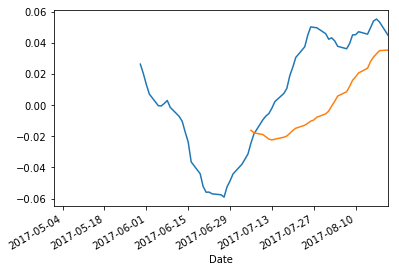

In [50]:
ma_8.plot()
ma_34.plot()